<a href="https://colab.research.google.com/github/guptaankit894/AI-using-python/blob/main/Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Programming Exercise**

This Exercise will provide a gist of various machine learning methods. It will follow the same order as in slides.

1. Supervised Learning Methods (Decision Tree, Random Forest, k-Nearest Neighbour, and Support Vector Machines).

2. Semi Suspervised Methods (Support Vector Machines).

3. Unsupervised Methods (k-means clustering).

4. Regression

**A customized Function**

First let's create a customized function, which allows you to visualize the decision boundary. For doing so, we will only use two features, and labels instead of all features. This function will require following  libraries **Matplotlib.pyplot**, **sklearn**, and **numpy**.  

In [1]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

# few parameters for plotting
plot_colors="ryb" # Red, yellow, blue


def plot_decision_boundary(clf, X, y, ax, xlabel, ylabel, n_classes, labels, plot_colors):
  DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=xlabel,
        ylabel=ylabel,
    )
  # Plot the training points
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=labels[i],edgecolor="black",s=15)

In [2]:
# load dataset, and split data for classification 
from sklearn.datasets import load_iris  # use only 2 features (1:3)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # performance metric for classification
iris=load_iris()
X = iris.data[:, 1:3]
y = iris.target
pair=[1,3]
X_train, X_test, Y_train, Y_test=train_test_split(X,y, test_size=0.3)

**Decision Trees**

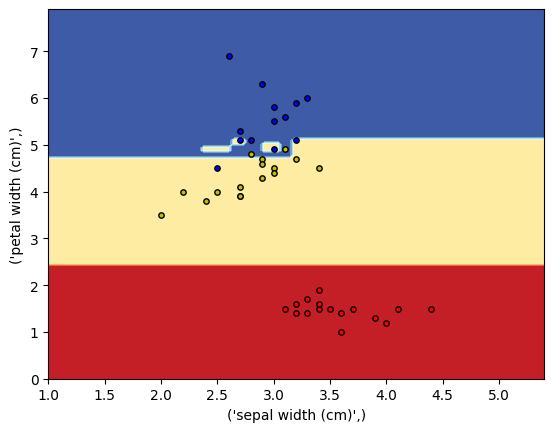

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

ax=plt.subplot(1,1,1)

xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],


plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

In [4]:
accuracy_score(model.predict(X_test), Y_test)

0.8666666666666667

[Text(0.5454545454545454, 0.9583333333333334, 'sepal width (cm) <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [34, 34, 37]'),
 Text(0.45454545454545453, 0.875, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6363636363636364, 0.875, 'sepal width (cm) <= 4.75\ngini = 0.499\nsamples = 71\nvalue = [0, 34, 37]'),
 Text(0.5454545454545454, 0.7916666666666666, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.7272727272727273, 0.7916666666666666, 'sepal width (cm) <= 5.15\ngini = 0.176\nsamples = 41\nvalue = [0, 4, 37]'),
 Text(0.6363636363636364, 0.7083333333333334, 'sepal length (cm) <= 3.15\ngini = 0.391\nsamples = 15\nvalue = [0, 4, 11]'),
 Text(0.5454545454545454, 0.625, 'sepal width (cm) <= 4.85\ngini = 0.337\nsamples = 14\nvalue = [0, 3, 11]'),
 Text(0.45454545454545453, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.6363636363636364, 0.5416666666666666, 'sepal length (cm) <= 2.35\ngini = 0.375\nsamples = 12\nvalue = [0, 3, 9]'),
 Text(0.545

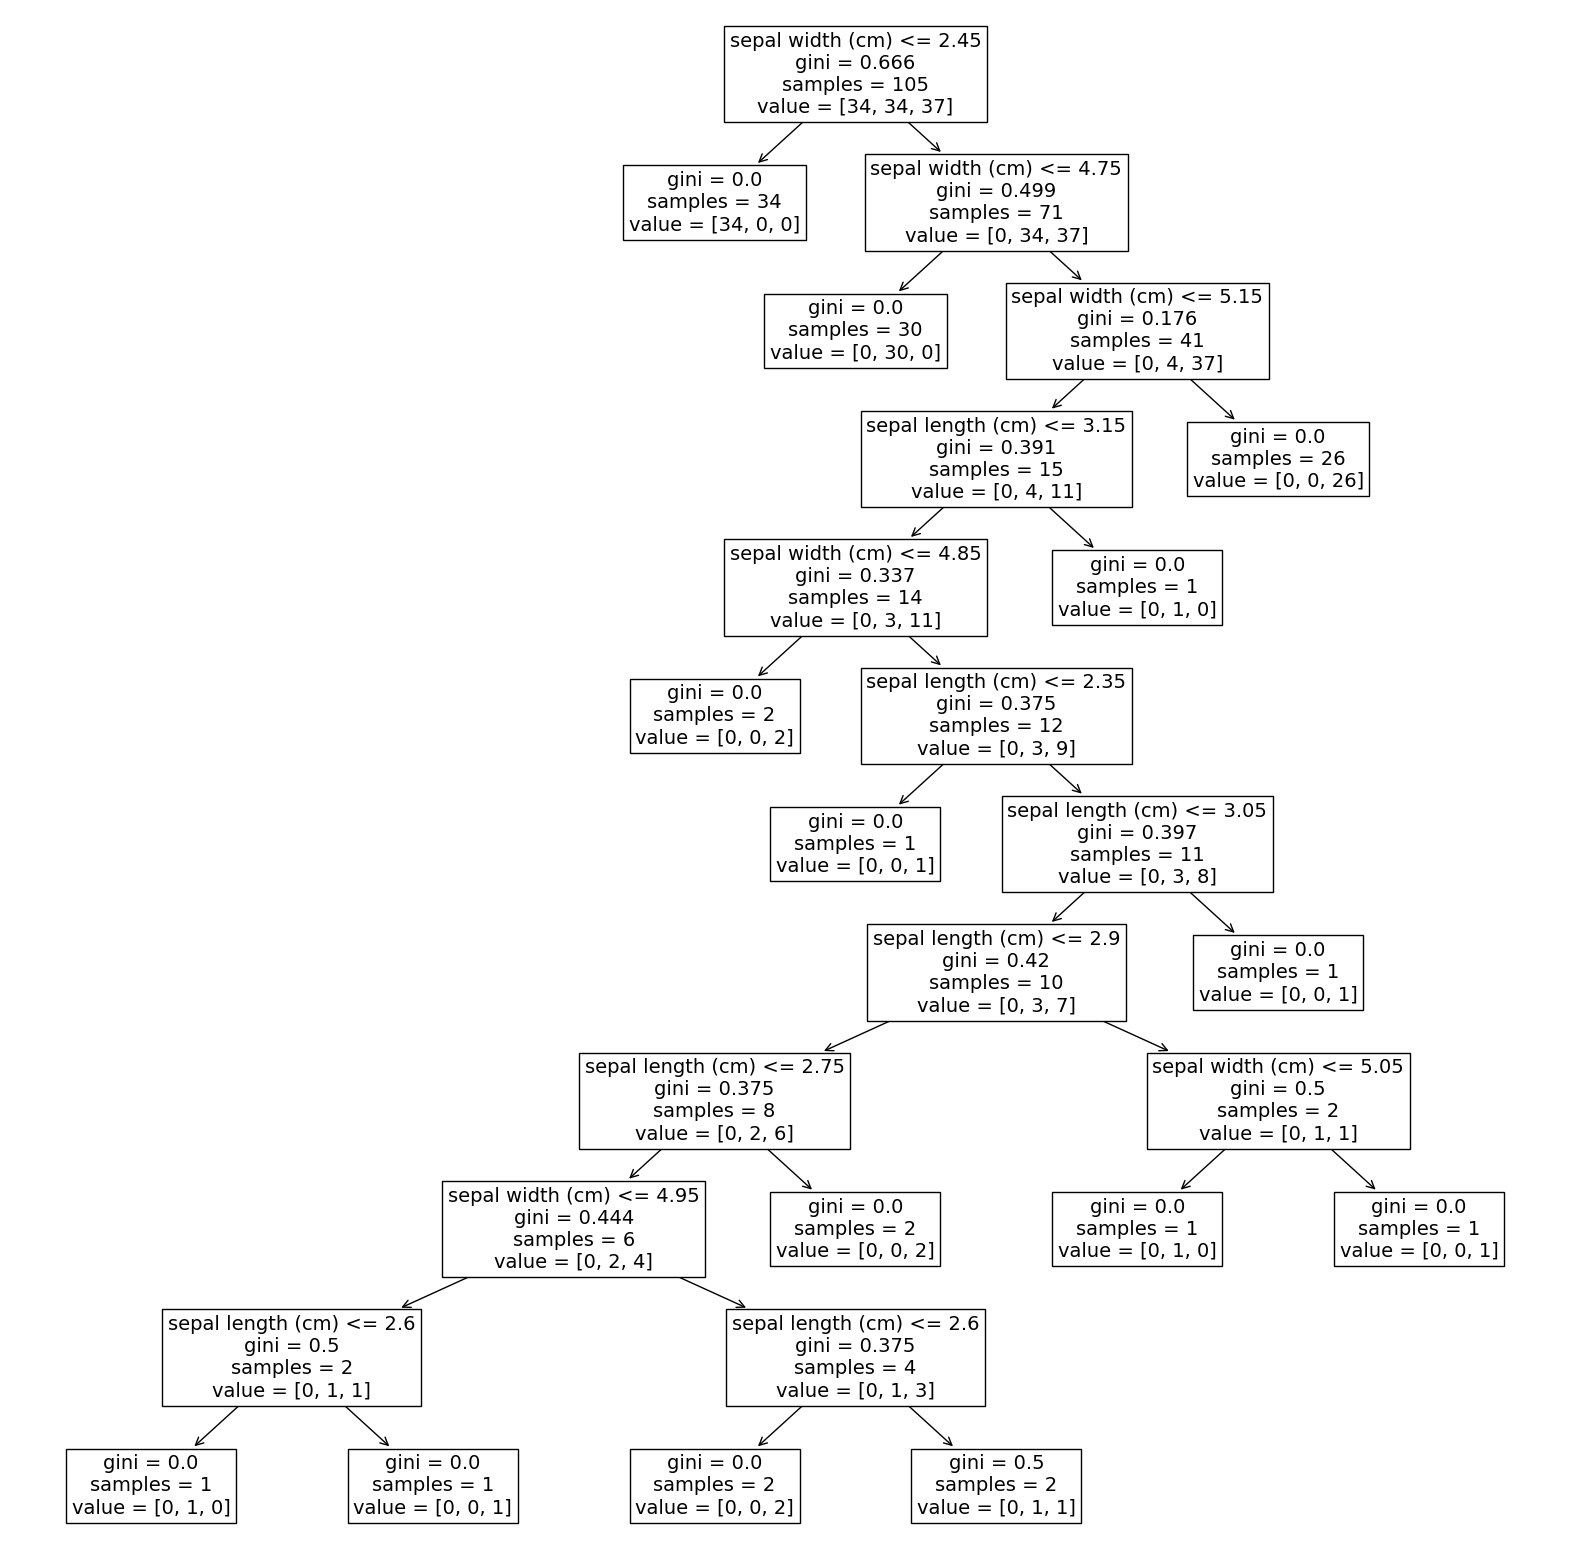

In [5]:
# Plot tree
plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=iris.feature_names, fontsize=14)

**Random Forest**

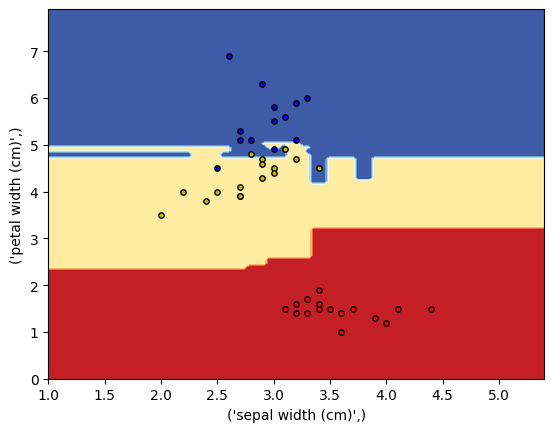

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier()
model.fit(X_train, Y_train)

ax=plt.subplot(1,1,1)
pair=[1,3]
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],


plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

[Text(0.5625, 0.9285714285714286, 'x[0] <= 3.35\ngini = 0.662\nsamples = 68\nvalue = [29, 37, 39]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[0] <= 2.95\ngini = 0.611\nsamples = 55\nvalue = [12, 37, 36]'),
 Text(0.16666666666666666, 0.6428571428571429, 'x[1] <= 4.75\ngini = 0.447\nsamples = 25\nvalue = [1, 28, 12]'),
 Text(0.08333333333333333, 0.5, 'x[1] <= 2.35\ngini = 0.071\nsamples = 15\nvalue = [1, 26, 0]'),
 Text(0.041666666666666664, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.125, 0.35714285714285715, 'gini = 0.0\nsamples = 14\nvalue = [0, 26, 0]'),
 Text(0.25, 0.5, 'x[1] <= 5.05\ngini = 0.245\nsamples = 10\nvalue = [0, 2, 12]'),
 Text(0.20833333333333334, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 6]'),
 Text(0.2916666666666667, 0.35714285714285715, 'x[0] <= 2.75\ngini = 0.375\nsamples = 6\nvalue = [0, 2, 6]'),
 Text(0.25, 0.21428571428571427, 'x[0] <= 2.6\ngini = 0.444\nsamples = 2\nvalue = [0, 2, 1]'),
 Text(0.2083333

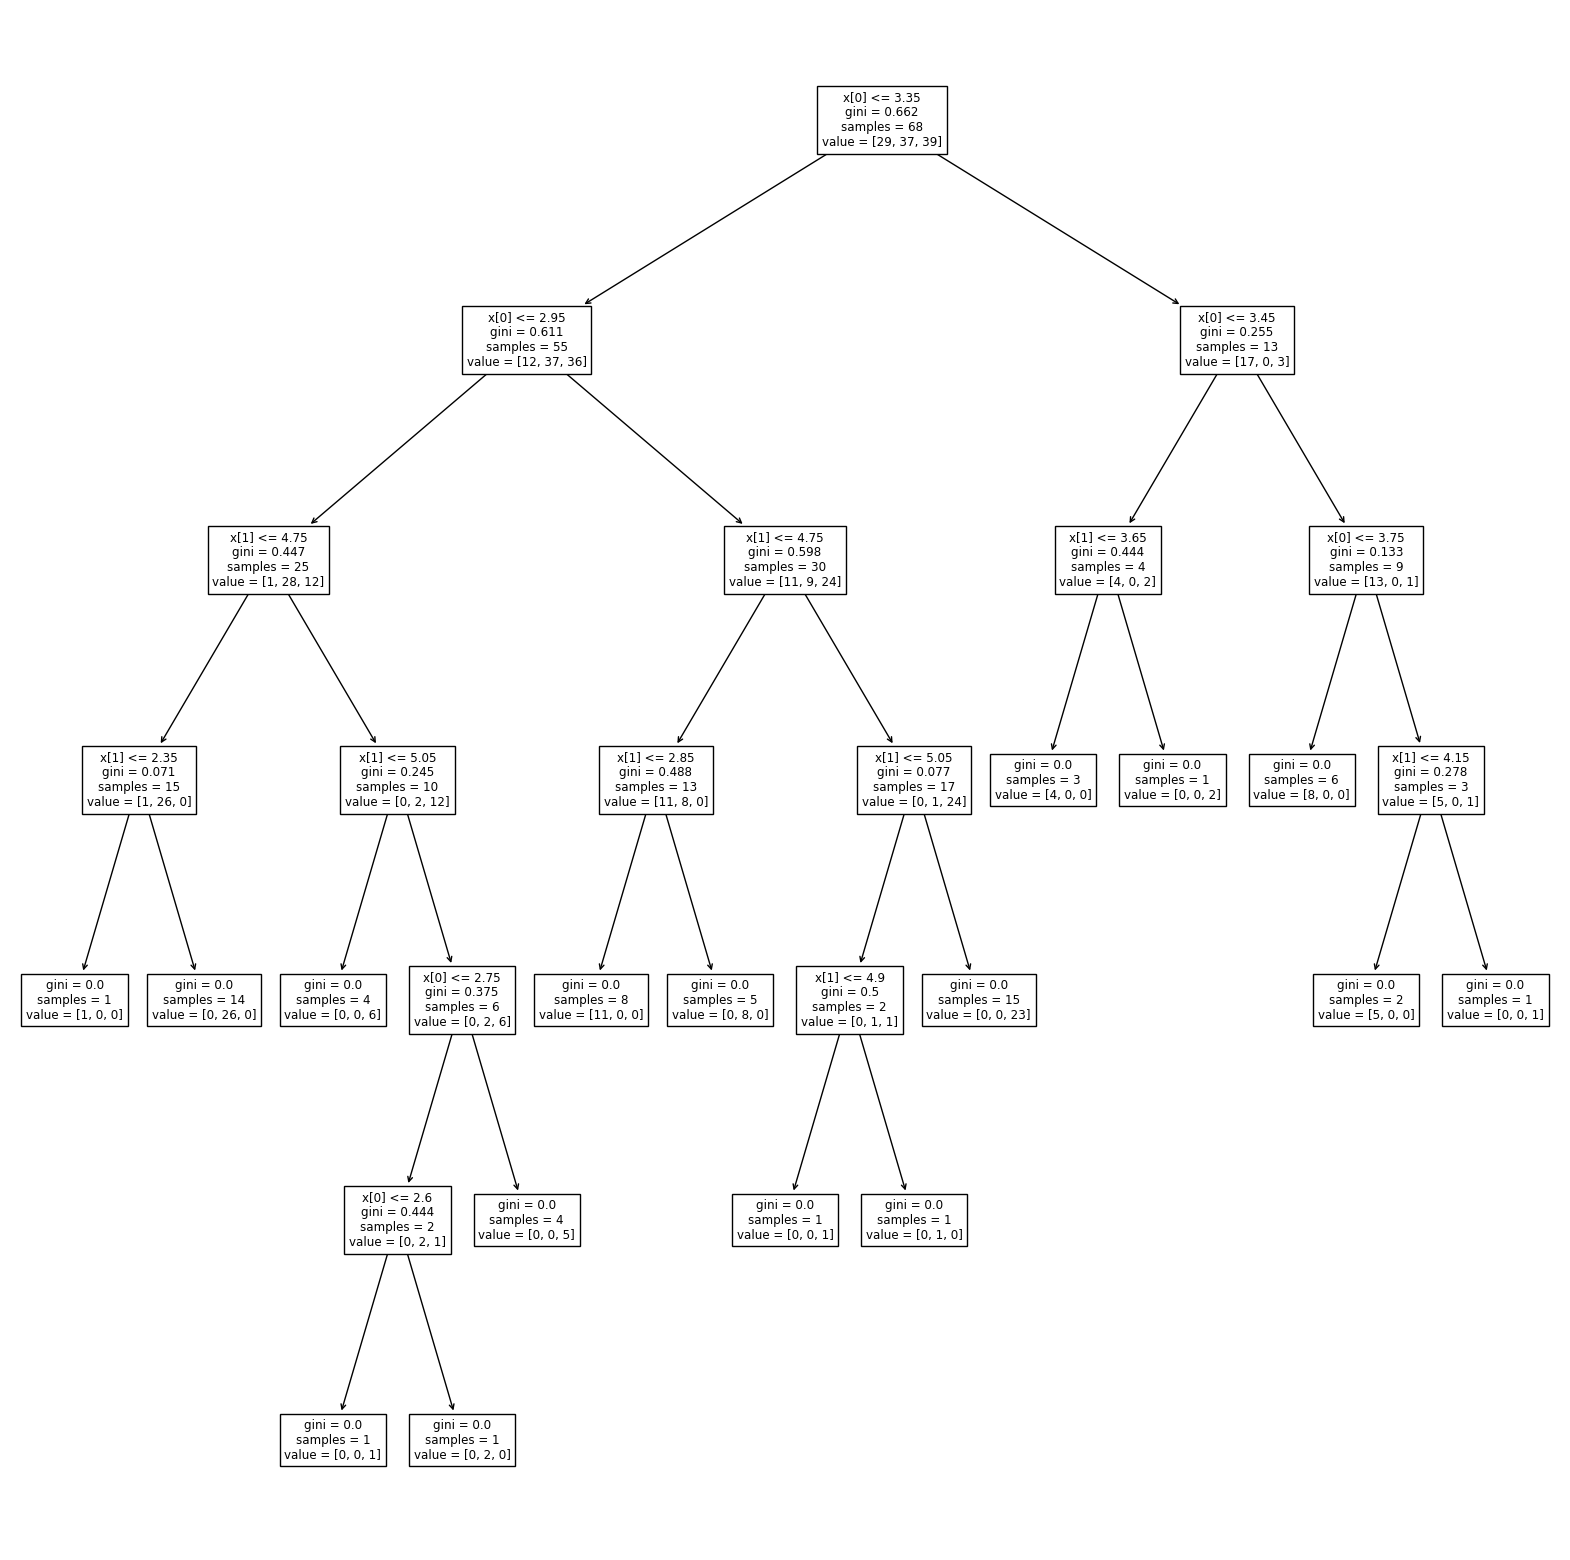

In [7]:
# Tree plotting
plt.figure(figsize=(20,20))
tree.plot_tree(model.estimators_[0])

**k-Nearest Neigbour**

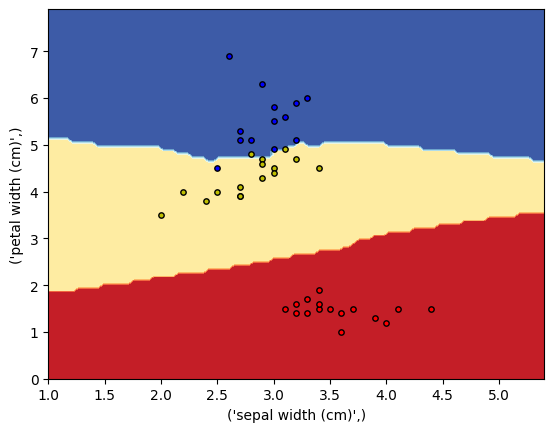

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(3)
model.fit(X_train,Y_train)

ax=plt.subplot(1,1,1)
pair=[1,3]
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],


plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

In [9]:
accuracy_score(model.predict(X_test), Y_test)

0.9333333333333333

**Naive Bayes**

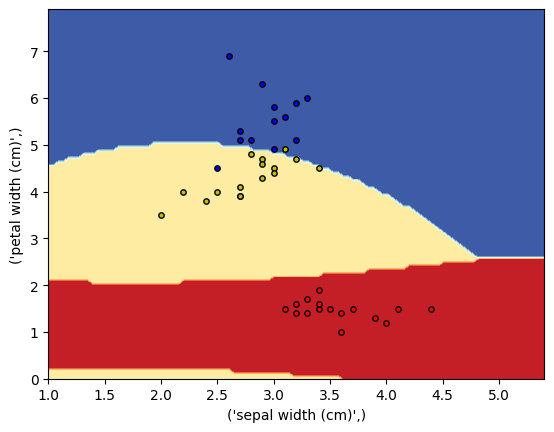

In [10]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

model.fit(X_train, Y_train)

ax=plt.subplot(1,1,1)
pair=[1,3]
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],


plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

In [11]:
accuracy_score(model.predict(X_test),Y_test)

0.9555555555555556

**Semi-supervised Learning**
SVM using linear kernel

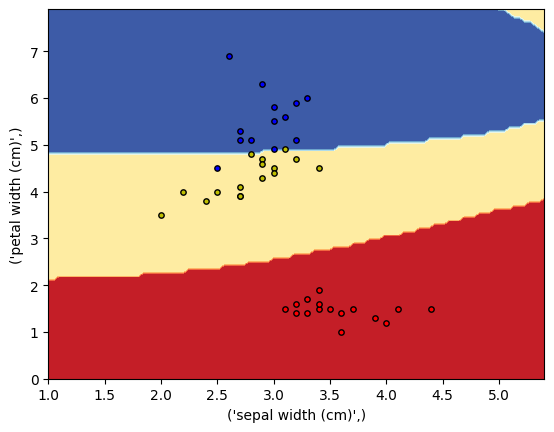

In [12]:
from sklearn import svm
model=svm.SVC()  # when no kernel is specified, we are using linear SVM
model.fit(X_train, Y_train)

ax=plt.subplot(1,1,1)
pair=[1,3]
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],


plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

In [13]:
accuracy_score(model.predict(X_test),Y_test)

0.9555555555555556

**Unsupervised Learning**
k-means clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


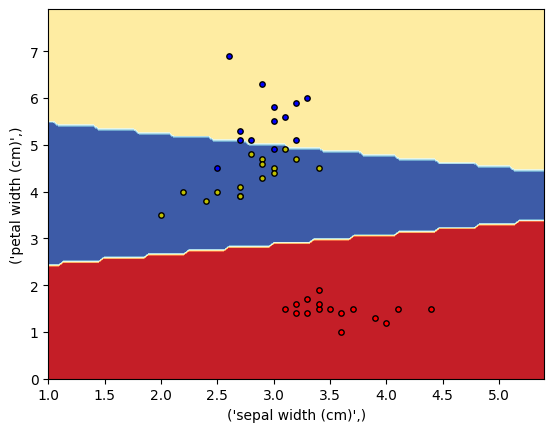

In [14]:
from sklearn.cluster import KMeans
model=KMeans(3)
model.fit(X_train)

ax=plt.subplot(1,1,1)
pair=[1,3]
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],


plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

**Regression Task**

For regression Task, we will use R-squared **(Coefficient of Determination)**, and **housing dataset** for prediction.

For plotting the fitting line, we will use seaborn library. You can install it using the following pip command:

**pip install seaborn**

**Linear Regression**

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score # Performance metric for regression
diabetes=load_diabetes()
X = diabetes.data[:,2]
y = diabetes.target

X_train, X_test, Y_train, Y_test=train_test_split(X,y, test_size=0.3)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [16]:
model=LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


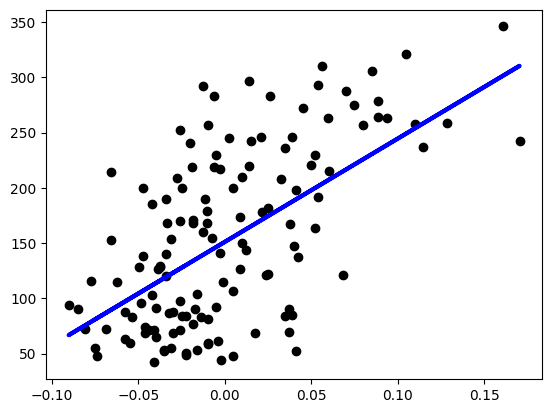

In [17]:
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

In [18]:
r2_score(y_pred, Y_test)

-0.8193966433540871

**Polynomial Regression**

For this we need to use a function  **PolynomialFeatures** from **sklearn.preprocessing**

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score # Performance metric for regression
diabetes=load_diabetes()
X = diabetes.data[:,3]
y = diabetes.target

X_train, X_test, Y_train, Y_test=train_test_split(X,y, test_size=0.3)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [41]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [42]:
poly_X_train = poly.fit_transform(X_train.reshape(-1, 1))
poly_X_test = poly.fit_transform(X_test.reshape(-1, 1))

In [43]:
model=LinearRegression()
model.fit(poly_X_train, Y_train)
y_pred=model.predict(poly_X_test)

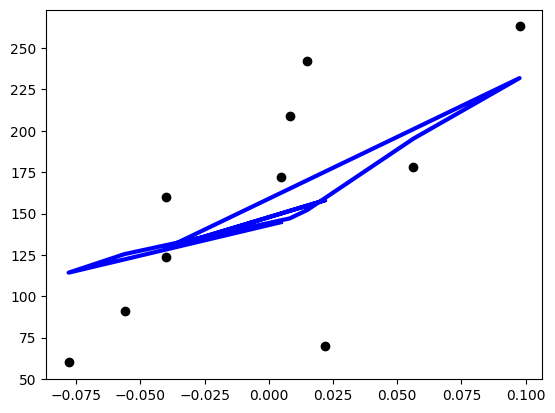

In [44]:
plt.scatter(X_test[10:20], Y_test[10:20], color="black")
plt.plot(X_test[10:20], y_pred[10:20], color="blue", linewidth=3)

In [45]:
r2_score(y_pred, Y_test)

-4.153984207062025